Nodes: 3783
Edges: 24186
Average Degree: 12.79
Density: 0.0017
Diameter: 10
Average Shortest Path Length: 3.65
Average Clustering Coefficient: 0.17662903035907684
Transitivity: 0.06356526410026858

Degree Distribution:
Degree 888: 1 nodes
Degree 494: 1 nodes
Degree 416: 1 nodes
Degree 407: 1 nodes
Degree 406: 1 nodes
Degree 400: 2 nodes
Degree 393: 1 nodes
Degree 341: 1 nodes
Degree 320: 2 nodes
Degree 287: 1 nodes
Degree 276: 1 nodes
Degree 271: 1 nodes
Degree 256: 1 nodes
Degree 254: 1 nodes
Degree 251: 1 nodes
Degree 244: 1 nodes
Degree 230: 1 nodes
Degree 223: 1 nodes
Degree 219: 1 nodes
Degree 215: 1 nodes
Degree 212: 1 nodes
Degree 210: 1 nodes
Degree 200: 1 nodes
Degree 191: 1 nodes
Degree 190: 1 nodes
Degree 182: 1 nodes
Degree 176: 1 nodes
Degree 172: 1 nodes
Degree 168: 1 nodes
Degree 164: 1 nodes
Degree 160: 1 nodes
Degree 159: 1 nodes
Degree 156: 2 nodes
Degree 155: 1 nodes
Degree 154: 1 nodes
Degree 152: 1 nodes
Degree 151: 1 nodes
Degree 147: 1 nodes
Degree 145: 1 nodes
D

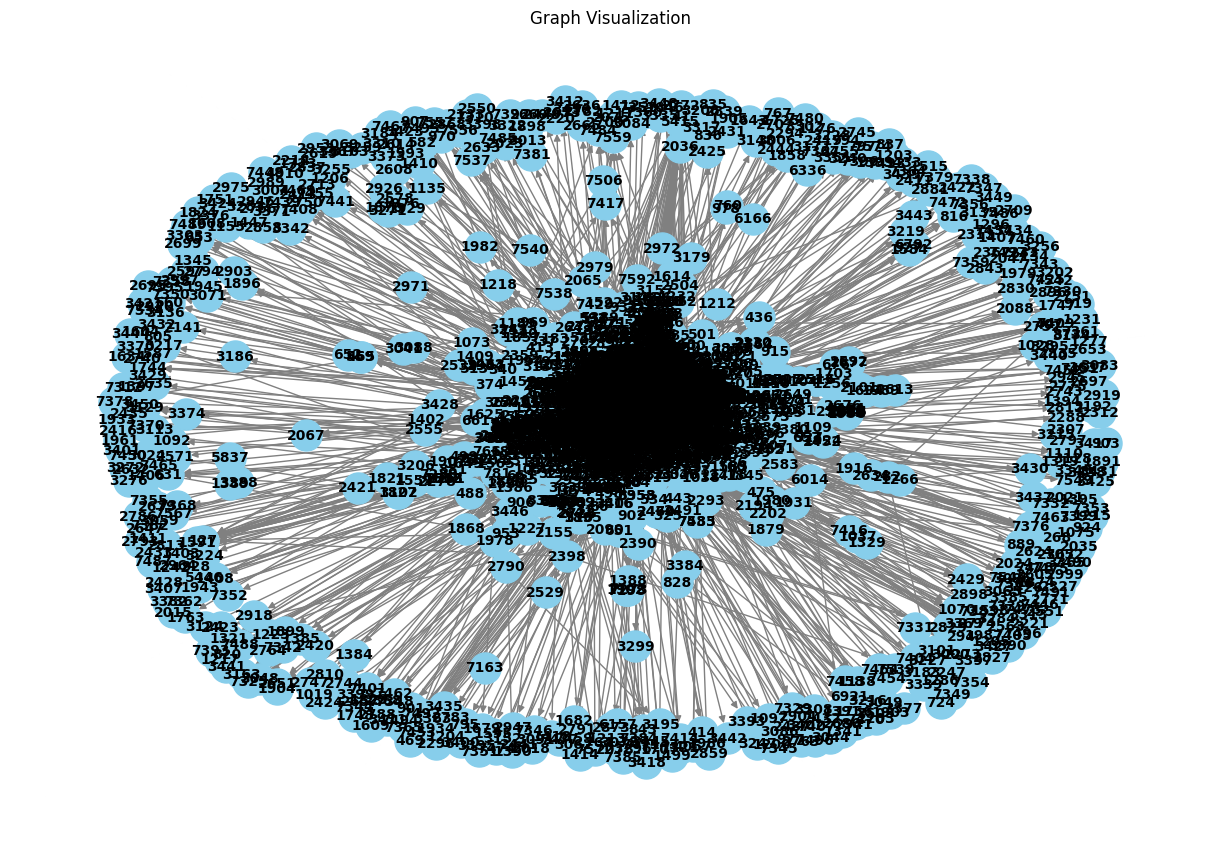


Network Centralization (Degree): 0.23147666267417732
Network Centralization (Betweenness): 0.14859085839440409
Network Centralization (Closeness): 0.13075643424085287
Network Centralization (PageRank): 0.016733182015086518


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

FILE_PATH = "desktop/bitcoina.csv"

def network(file_path):
    try:
        df = pd.read_csv(file_path, header=None, names=["Source", "Target", "Weight", "Timestamp"])
        G = nx.from_pandas_edgelist(df, "Source", "Target", edge_attr="Weight", create_using=nx.DiGraph())
        return G
    except Exception as e:
        print(f"Error loading file: {str(e)}")
        raise

def calculate_metrics(G):
    metrics = {}
    metrics['num_nodes'] = G.number_of_nodes()
    metrics['num_edges'] = G.number_of_edges()
    metrics['avg_degree'] = np.mean([d for n, d in G.degree()])
    metrics['density'] = nx.density(G)

    try:
        largest_scc = max(nx.strongly_connected_components(G), key=len)
        G_scc = G.subgraph(largest_scc).copy()
        metrics['diameter'] = nx.diameter(G_scc)
        metrics['avg_shortest_path'] = nx.average_shortest_path_length(G_scc)
    except:
        metrics['diameter'] = -1
        metrics['avg_shortest_path'] = -1

    metrics['avg_clustering'] = nx.average_clustering(G.to_undirected())
    metrics['transitivity'] = nx.transitivity(G)
    
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    metrics['degree_distribution'] = dict(Counter(degree_sequence))

    degree = nx.degree_centrality(G)
    pagerank = nx.pagerank(G, alpha=0.85, max_iter=1000)
    closeness = nx.closeness_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    
    # Top 5 nodes by centrality measures
    metrics['degree'] = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:5]
    metrics['pagerank'] = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
    metrics['closeness'] = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]
    metrics['betweenness'] = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
    
    metrics['centralities'] = {
        'degree': degree,
        'pagerank': pagerank,
        'closeness': closeness,
        'betweenness': betweenness
    }
    
    return metrics

def plot_graph(G):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", 
            node_size=500, font_size=10, font_weight="bold")
    plt.title("Graph Visualization")
    plt.show()

def print_results(metrics):
    print(f"Nodes: {metrics['num_nodes']}")
    print(f"Edges: {metrics['num_edges']}")
    print(f"Average Degree: {metrics['avg_degree']:.2f}")
    print(f"Density: {metrics['density']:.4f}")
    print(f"Diameter: {metrics['diameter']}")
    print(f"Average Shortest Path Length: {metrics['avg_shortest_path']:.2f}")
    print(f"Average Clustering Coefficient: {metrics['avg_clustering']}")
    print(f"Transitivity: {metrics['transitivity']}")
    print("\nDegree Distribution:")
    for degree, count in metrics['degree_distribution'].items():
        print(f"Degree {degree}: {count} nodes")
    
    print("\nTop 5 Nodes by Centrality Measures:")
    print("Degree:", metrics['degree'])
    print("PageRank:", metrics['pagerank'])
    print("Closeness:", metrics['closeness'])
    print("Betweenness:", metrics['betweenness'])

def centralization(centrality_dict, num_nodes):
    max_centrality = max(centrality_dict.values())
    return sum(max_centrality - v for v in centrality_dict.values()) / (num_nodes - 1)

def main():
    G = network(FILE_PATH)
    metrics = calculate_metrics(G)
    print_results(metrics)
    plot_graph(G)

    # Centralization calculations
    num_nodes = metrics['num_nodes']
    centrality_results = metrics['centralities']
    centralization_degree = centralization(centrality_results['degree'], num_nodes)
    centralization_betweenness = centralization(centrality_results['betweenness'], num_nodes)
    centralization_closeness = centralization(centrality_results['closeness'], num_nodes)
    centralization_pagerank = centralization(centrality_results['pagerank'], num_nodes)

    print("\nNetwork Centralization (Degree):", centralization_degree)
    print("Network Centralization (Betweenness):", centralization_betweenness)
    print("Network Centralization (Closeness):", centralization_closeness)
    print("Network Centralization (PageRank):", centralization_pagerank)

if __name__ == "__main__":
    main()